In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

```{admonition} Question 1
**carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오**
```

In [2]:
import matplotlib.pyplot as plt

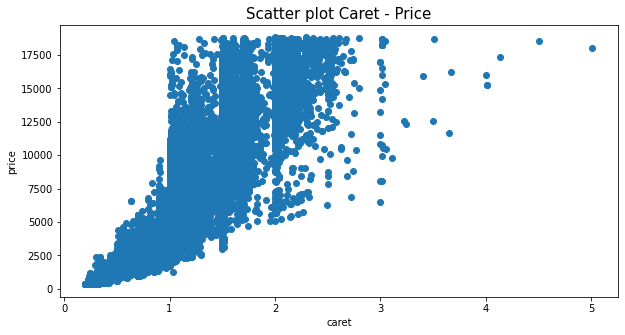

In [3]:
plt.show()

```{admonition} Question 2
**carat과 price사이의 상관계수와 상관계수의 p-value값은?**
```

In [5]:
print(corr_by_pandas)

0.9215913011934687


In [6]:
from scipy import stats

In [8]:
print(corr_by_scipy)

0.9215913011934771


In [9]:
print(pv)

0.0


```{admonition} Question 3
**color에 따른 price 값의 분포는 아래와 같다.**
```

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='color', ylabel='price'>

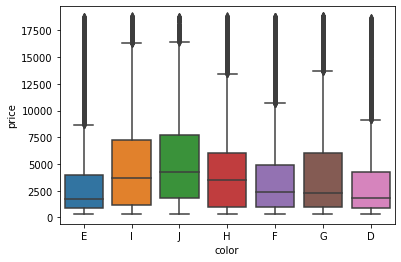

In [12]:
sns.boxplot(data=df,x='color',y='price')

```{admonition} Question 3-1
**Diamond의 평균가격은 3932로 알려져있다. 'H' color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오**
```

In [14]:
print(static)
print(pv)
print(hypo)

11.988997411117696
7.569973305218302e-33
False


```{admonition} Question 3-2
**그래프상에서 'F'와 'G'는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고조건에 맞는 독립표본 t검정을 시행하라**
```

In [17]:
print(leve)
print(fli)
print(bartlet)

LeveneResult(statistic=53.627886257416655, pvalue=2.511093007074788e-13)
FlignerResult(statistic=37.04347553879807, pvalue=1.155244880009172e-09)
BartlettResult(statistic=47.52732212014331, pvalue=5.424264079257202e-12)


등분산 조건 확인시 귀무가설 기각(p-value <0.05), 유의수준하에 'H와 G 집단간 분산은 같지 않다'

In [19]:
t_test_FG

Ttest_indResult(statistic=-5.045279980436125, pvalue=4.5670321227041464e-07)

독립표본 t검정 시행시 귀무가설 기각(p-value <0.05), 유의수준하에 'H와 G 집단간 평균은 같지 않다'

```{admonition} Question 3-3
**color 'F','G','D' 세집단의 price값들에 대해 anova분석을 시행하라.**
```

등분산검정

In [22]:
print(bartlett)
print(fligner)
print(levene)

BartlettResult(statistic=289.1436443252346, pvalue=1.6340125811454025e-63)
FlignerResult(statistic=494.6459169558573, pvalue=3.881538382653629e-108)
LeveneResult(statistic=118.97521469312785, pvalue=3.557425577381817e-52)


정규성검정

In [24]:
print(FG)
print(FD)
print(GD)

KstestResult(statistic=0.06151941343574685, pvalue=1.852300346010811e-17)
KstestResult(statistic=0.09505504118130681, pvalue=6.994405055138486e-15)
KstestResult(statistic=0.12093708375978551, pvalue=2.0167762615717943e-54)


In [26]:
anova

F_onewayResult(statistic=101.1811790316069, pvalue=1.6513790091285713e-44)

세집단의 분산분석 시행결과 귀무가설을 기각하고 (p-value <0.05) 유의수준 하에서 세집단 중 어느 두집단의 평균은 같지 않다(정확한 검정을 위해서는 사후검정실시해야함)

```{admonition} Question 4
**연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.**
```

In [29]:
ratio_df

,column,ratio
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


```{admonition} Question 5
**color에 따른 price의 max, min, 평균값을 colorDf 변수에 저장하고 아래와 같이 출력하는 코드를 작성하라**
```

In [31]:
colorDf

,max,min,mean
color,,,
D,18693,357,3169.954096
E,18731,326,3076.752475
F,18791,342,3724.886397
G,18818,354,3999.135671
H,18803,337,4486.669196
I,18823,334,5091.874954
J,18710,335,5323.818020


```{admonition} Question 6
**전체 데이터중 color의 발생빈도수에 따라 labelEncoding(빈도수 적은것 : 1, 빈도수 증가할수록 1씩증가)을 하고 colorLabel 컬럼에 저장하고 cut에 따른 colorLabel의 평균값을 구하여라**
```

In [35]:
df['colorLabel'].head(3)

1    6
2    6
3    6
Name: colorLabel, dtype: int64

In [36]:
mean_cut

,colorLabel
cut,
Fair,4.516770
Good,4.562780
Ideal,4.769152
Premium,4.644913
Very Good,4.654362


```{admonition} Question 7
**price의 값에 따른 구간을 1000단위로 나누고 priceLabel 컬럼에 저장하라. 저장시 숫자 순으로 label하고(0~999 : 0,1000~1999 :1 ...) 최종적으로 구간별 갯수(변수명:labelCount)를 출력하라**
```

In [40]:
labelCount

,binSection,value_counts
0,0,14524
1,1,9683
2,2,6129
3,4,4665
4,3,4225
5,5,3163
6,6,2278
7,7,1668
8,8,1307
9,9,1076
